## Results of the simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import pandas as pd

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[7,7]

In [2]:
file_name = "DF_out_correct_long.txt"

file = open(file_name, 'r')

N_part = int(file.readline()) # read the first line where is written the number of particles
dim = file.readline()
t_0 = file.readline() # read the third line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

print('N_part : ', N_part)
print('dim : ', dim)
print('initial time : ', t_0)
print('N_lines: ', N_lines)

N_part :  10000
dim :   3

initial time :    0.0000000E+00

N_lines:  15031503


In [3]:
N_lines_snap = 3+N_part*3
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  501.0


In [4]:
data = pd.read_csv(file_name, names=list(range(7)), sep = ' ')

def dati (data, N):
    
    x = []
    y = []
    z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
    
    r = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,r,t

x,y,z,r,t=dati(data, N_part)

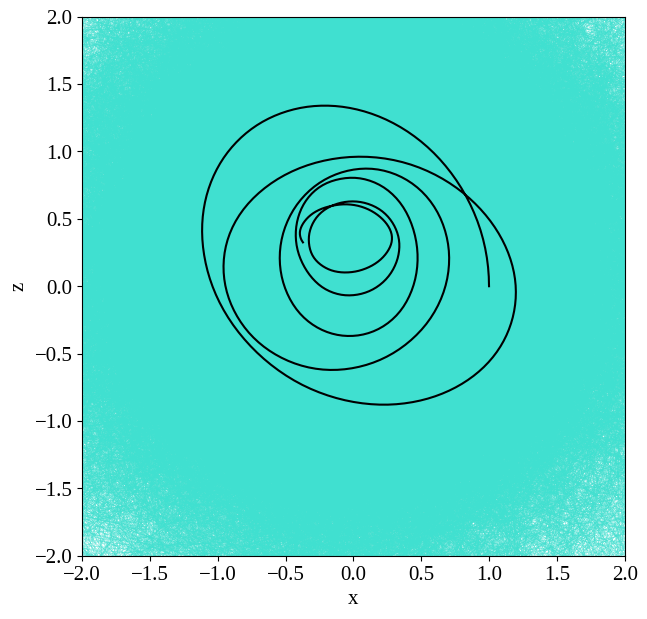

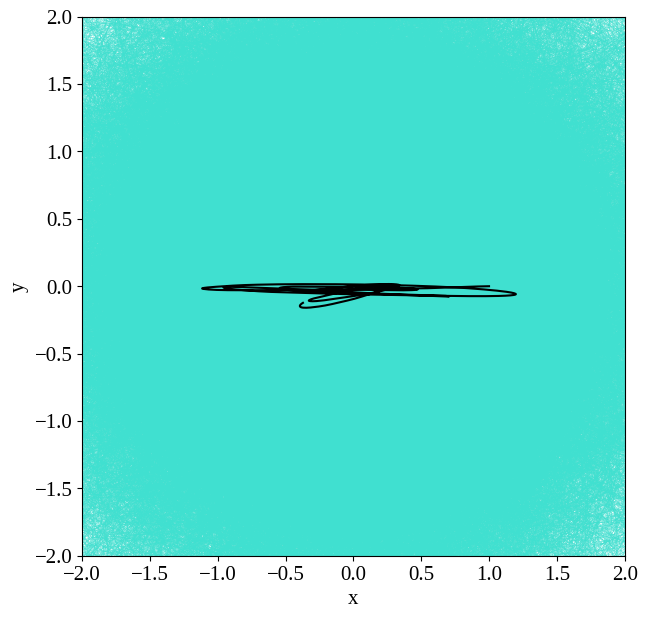

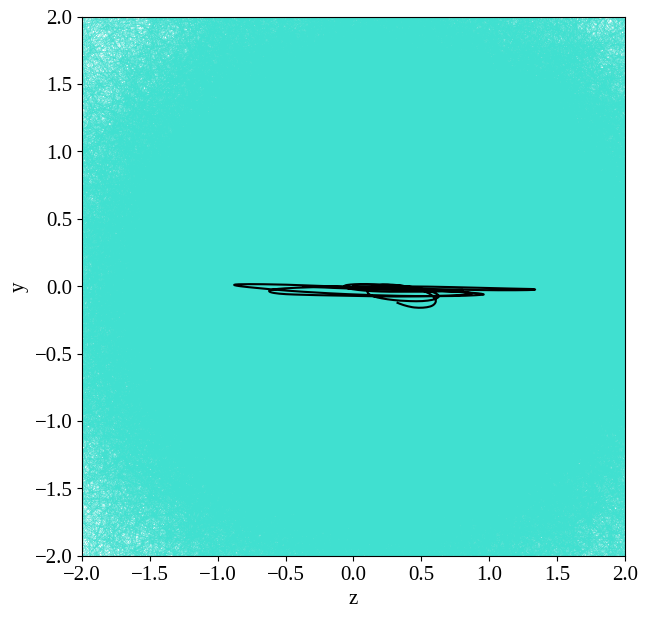

In [5]:
for i in range(N_part-1):
    plt.plot(x[i], z[i], color='turquoise', lw=0.2)
    
plt.plot(x[-1], z[-1], color='Black')

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

for i in range(N_part-1):
    plt.plot(x[i], y[i], color='turquoise', lw=0.2)
    
plt.plot(x[-1], y[-1], color='Black')

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

for i in range(N_part-1):
    plt.plot(z[i], y[i], color='turquoise', lw=0.2)
    
plt.plot(z[-1], y[-1], color='Black')

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('z')
plt.ylabel('y')
plt.show()

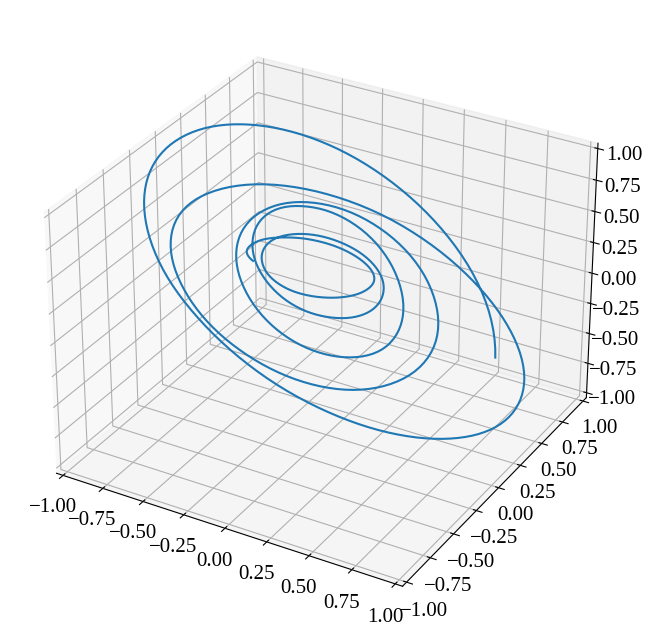

In [6]:
from mpl_toolkits import mplot3d

%matplotlib inline

l=1


fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

ax.plot3D(x[-1], y[-1], z[-1])

ax.axes.set_xlim3d(left=-l, right=l) 
ax.axes.set_ylim3d(bottom=-l, top=l) 
ax.axes.set_zlim3d(bottom=-l, top=l)
plt.show()

In [7]:
N = int(1e4)-1
M = 1 
m = np.ones(N)*(M / N)
b = 1
M_df=1e-2
m=np.append(m, M_df)

In [8]:
x=np.array(x)
y=np.array(y)
z=np.array(z)

In [9]:
x_pert=x[-1]
y_pert=y[-1]
z_pert=z[-1]

In [10]:
x_part=x[:-1]
y_part=y[:-1]
z_part=z[:-1]

In [11]:
x_sort=np.sort(x_part, axis=0)
y_sort=np.sort(y_part, axis=0)
z_sort=np.sort(z_part, axis=0)

x_sort=x_sort[1000:9000]
y_sort=y_sort[1000:9000]
z_sort=z_sort[1000:9000]

print(x_sort[:,0])

[-1.3117083 -1.3116792 -1.3100194 ...  1.3311523  1.3314004  1.331627 ]


In [12]:
CM_x=[]
CM_y=[]
CM_z=[]

npart=8000

for i in range(len(t)):

    CM_x.append((np.sum(x_sort[:,i]*m[:npart])+(x_pert[i]*M_df))/(np.sum(m[:npart])+M_df))
    CM_y.append((np.sum(y_sort[:,i]*m[:npart])+(y_pert[i]*M_df))/(np.sum(m[:npart])+M_df))
    CM_z.append((np.sum(z_sort[:,i]*m[:npart])+(z_pert[i]*M_df))/(np.sum(m[:npart])+M_df))
    
CM_x=np.array(CM_x)
CM_y=np.array(CM_y)
CM_z=np.array(CM_z)

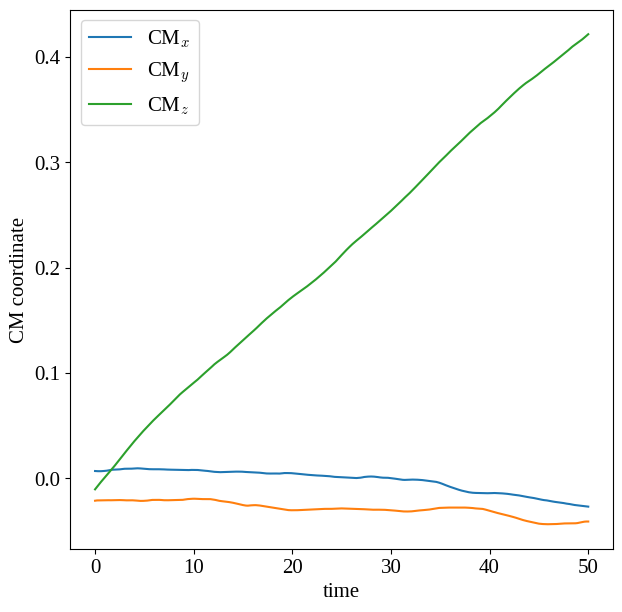

In [17]:
plt.plot(t, CM_x, label='CM$_x$')
plt.plot(t, CM_y, label='CM$_y$')
plt.plot(t, CM_z, label='CM$_z$')

plt.xlabel('time')
plt.ylabel('CM coordinate')

plt.legend()
plt.show()

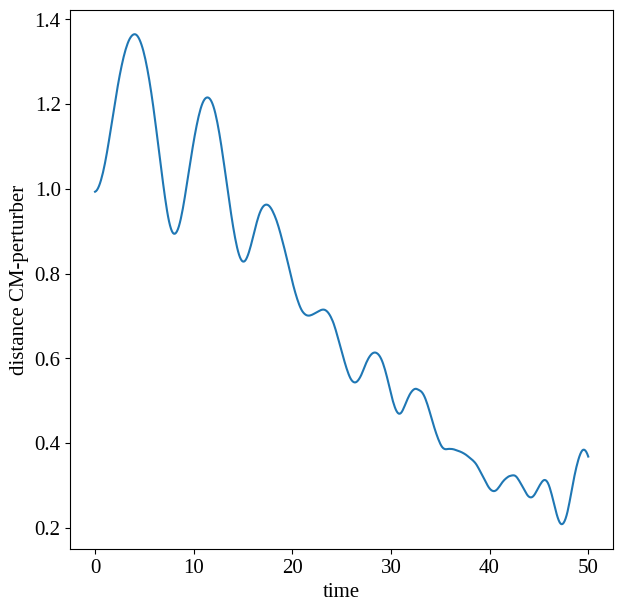

In [14]:
dist=np.sqrt((x_pert-CM_x)**2+(y_pert-CM_y)**2+(z_pert-CM_z)**2)

plt.plot(t, dist)

plt.xlabel('time')
plt.ylabel('distance CM-perturber')

plt.show()

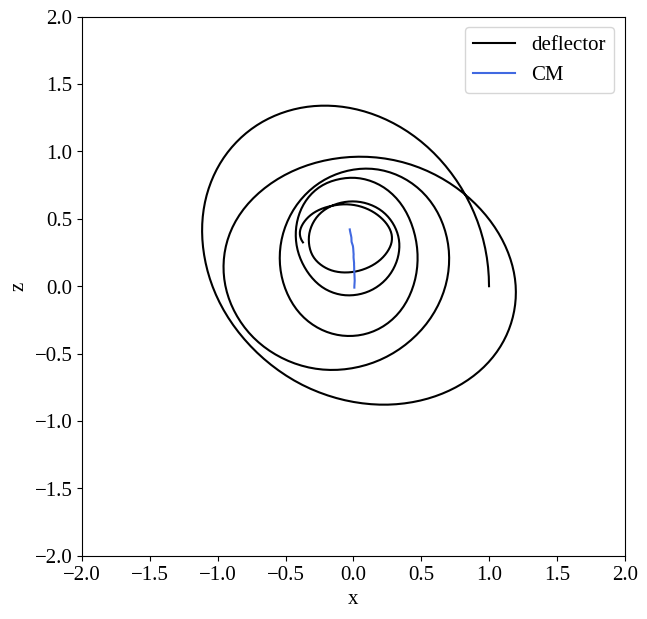

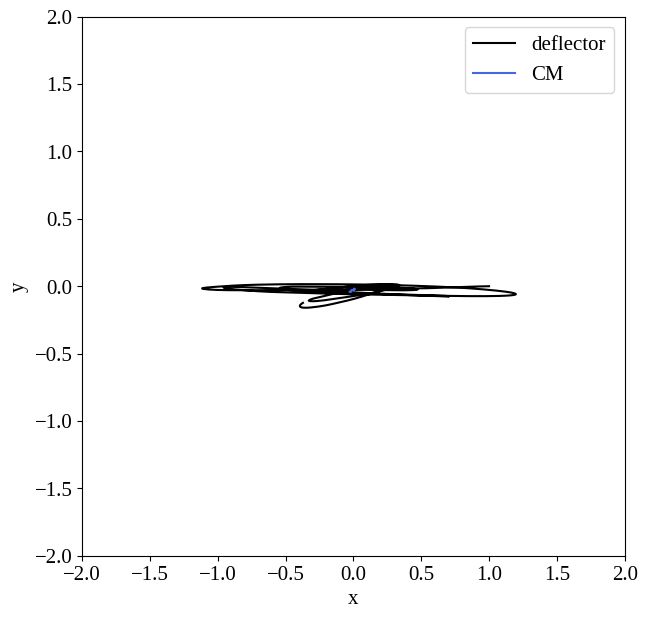

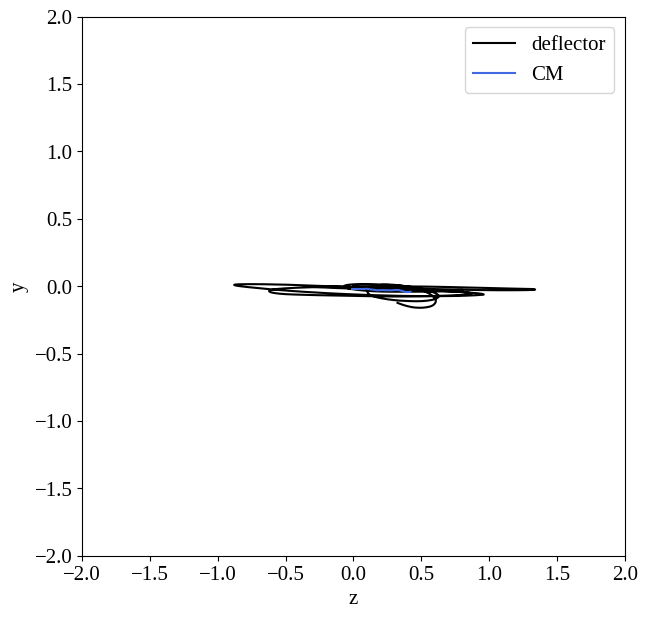

In [15]:
plt.plot(x[-1], z[-1], color='Black', label='deflector')

plt.plot(CM_x, CM_z, color='royalblue', label='CM')

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.show()

plt.plot(x[-1], y[-1], color='Black', label='deflector')

plt.plot(CM_x, CM_y, color='royalblue', label='CM')

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(z[-1], y[-1], color='Black', label='deflector')

plt.plot(CM_z, CM_y, color='royalblue', label='CM')

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('z')
plt.ylabel('y')
plt.legend()
plt.show()